# Question 2 - Analysis 1

#### Combine the 2 datasets *(archives and article search)* as both have same data structure and eliminate dupllicate articles
#### Find Dates for each article and find number of reporters who reported on those dates. If the article doesn't have reporters, use the source instead
#### Eliminate the duplicate reporters *(a reporter reporting 2 articles on same day)*
#### Load all the values into a dictionary and display recent 50 days vs number of reporters reported on these days. Data is also present to show who all reported on which day but not plotted. It is stored in a json file

In [224]:
import json, os, glob, matplotlib.pyplot as plt
from datetime import datetime

In [225]:
current_dir = os.path.dirname('__file__')
data_dir = os.path.join(current_dir, '..', 'data','question2','*','*.json')

In [226]:
already_present_file = []
for filename in glob.glob(data_dir):
    with open(filename) as fil:
        current_file = json.load(fil)
        this_response = [artic for artic in current_file if artic['_id'] not in [articles['_id'] for articles in already_present_file]]
        already_present_file.extend(this_response)

In [227]:
dict_for_articles_covered = {}

for article in already_present_file:
    datetime_object = datetime.strptime(article['pub_date'][:10], '%Y-%m-%d')
    analyzed_data = []
    try:
        analyzed_data = [person['firstname']+' '+person['lastname'] for person in article['byline']['person']]
        list(set(analyzed_data))
    except:
        analyzed_data = [article['source']]
    if datetime_object in dict_for_articles_covered:
        dict_for_articles_covered[datetime_object] += (analyzed_data)
    else:
        dict_for_articles_covered[datetime_object] = (analyzed_data)
        
for key, value in dict_for_articles_covered.items():
    dict_for_articles_covered[key] = list(set(value))
        
dict_for_articles_covered_sorted = sorted(dict_for_articles_covered.items(), reverse=True)

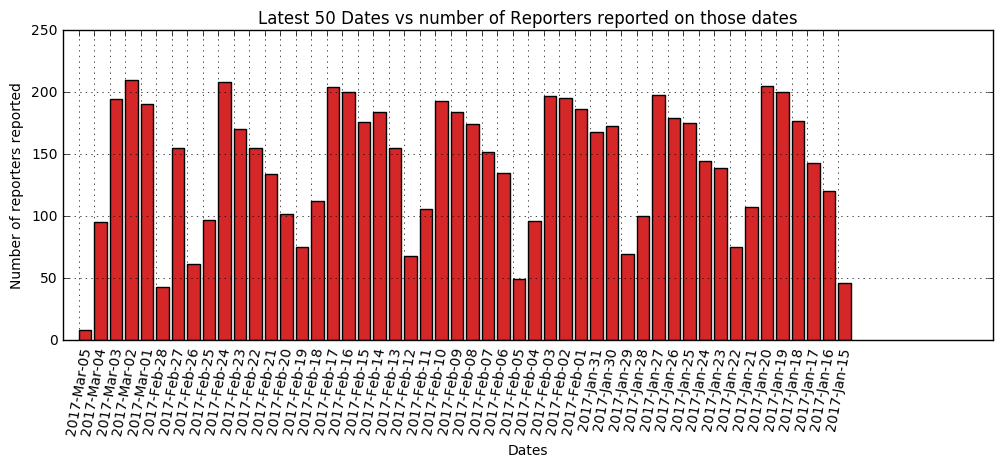

In [228]:
# x and y axes and dates for lables
x_val = []
y_val = []
words = []
count = 0
for key, value in dict_for_articles_covered_sorted:
    words.append(key.strftime("%Y-%b-%d"))
    count+=1
    x_val.append(count)
    y_val.append(len(value))

fig = plt.figure()                                                           #Width of each bar
plt.bar(x_val[:50], y_val[:50], color='#d62728')             #Graph type with values for both axes
plt.grid(True)                                                               #Show grid
plt.xticks(x_val[:50], words[:50],  rotation=80)
plt.ylabel('Number of reporters reported')
plt.xlabel('Dates')
plt.title('Latest 50 Dates vs number of Reporters reported on those dates')  
fig.set_figwidth(12, 10)                                                     #Graph width
plt.show()                                                                   ##Show graph


In [229]:
#Function to write data to json file at respective location
def write_to_json_file(file_path, json_data):
    with open(file_path, 'w') as json_out:
        json.dump(json_data, json_out, indent=2)

def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_1')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder=create_directory_for_output()

file_name = 'dates_VS_no_of_reporters'
file_path = os.path.join(output_folder, file_name)
file_path+='.json'

final_output_file = {}

for art in dict_for_articles_covered_sorted:
    key = art[0].strftime("%Y-%b-%d")
    final_output_file[key] = (art[1])

write_to_json_file(file_path, final_output_file)